# AbacusCosmos Python Interface Examples

This notebook demonstrates the basic usage of the `AbacusCosmos.Halos` and `AbacusCosmos.Halotools` halo catalog interfaces.

The AbacusCosmos Python package is available here: https://github.com/lgarrison/AbacusCosmos

The catalogs are documented on the data release website: https://lgarrison.github.io/AbacusCosmos/

If you encounter problems with the catalogs/Python code, please [file an issue](https://github.com/lgarrison/AbacusCosmos).  Also be sure to check the [Data Specifications](https://lgarrison.github.io/AbacusCosmos/data_specifications/), as your issue may be covered there.

Author: Lehman Garrison ([@lgarrison](https://github.com/lgarrison))

## [Halos.py](https://github.com/lgarrison/AbacusCosmos/blob/master/AbacusCosmos/Halos.py)

In [1]:
from AbacusCosmos import Halos

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Load a single halo Rockstar catalog with particle subsamples:

In [2]:
# The path to the catalog will be different on your system
cat = Halos.make_catalog_from_dir(dirname='/mnt/store2/bigsim_products/AbacusCosmos_1100box_products/AbacusCosmos_1100box_00_products/AbacusCosmos_1100box_00_rockstar_halos/z0.300',
                                  load_subsamples=True, load_pids=False)
halos = cat.halos
halo_1000 = halos[1000]
subsamples = cat.subsamples

In [3]:
for field in sorted(halo_1000.dtype.fields):
    print field, ':', halo_1000[field]

A : [ 53.04890823   5.39909792  -9.3987608 ]
A2 : [ 39.85029221   6.90763903  -7.76677895]
J : [ -1.96935156e+13   2.79465133e+13  -1.44266725e+13]
N : 155
N_SO : 983
Voff : 29.6215
Xoff : 22.5928
alt_N : [135 121  91  29]
alt_N_SO : [983 983 983  48]
alt_m : [  5.03707704e+12   4.51471370e+12   3.39536301e+12   1.08203881e+12]
alt_m_SO : [  3.66773849e+13   3.66773849e+13   3.66773849e+13   1.79096073e+12]
b_to_a : 0.462127
b_to_a2 : 0.381544
bulkvel : [ -663.75305176    93.82868958 -1657.2800293 ]
bullock_spin : 0.0713309
c_to_a : 0.330447
c_to_a2 : 0.274972
child_r : 0.439964
corevel : [ -682.87280273   108.45961761 -1700.54968262]
desc : 0
energy : -9.7564e+16
flags : 25
halfmass_radius : 154.012
id : 298710
kin_to_pot : 0.726075
klypin_rs : 49.5365
m : 5.78331e+12
m_SO : 3.66774e+13
m_pe_b : 5.29508e+12
m_pe_d : 3.5073e+12
mgrav : 4.7759e+12
min_bulkvel_err : 984.373
min_pos_err : 0.000250784
min_vel_err : 1050.16
n_core : 98
num_child_particles : 206
num_p : 206
p_start : 7390040

The subsample particles should be near the halo location of `(426.9362793, 15.22821426, 237.38449097)`, and indeed they are:

In [4]:
particles_for_halo_1000 = subsamples[halo_1000['subsamp_start']:halo_1000['subsamp_start']+halo_1000['subsamp_len']]
print particles_for_halo_1000['pos']

[[ 426.91430664   15.24571419  237.90284729]
 [ 427.37713623   15.36857128  237.59571838]
 [ 427.23428345   15.09571362  237.58428955]
 [ 426.9442749    15.06714249  237.53713989]
 [ 426.88571167   15.22571373  237.47570801]
 [ 426.90570068   15.15857124  237.44285583]
 [ 426.75427246   15.26714325  237.44142151]
 [ 427.12286377   15.10857201  237.41999817]
 [ 427.16430664   15.28857136  237.35858154]
 [ 426.79858398   15.33000088  237.34571838]
 [ 426.95858765   15.26571369  237.34143066]
 [ 426.99429321   15.20714283  237.32713318]
 [ 426.67285156   15.55428505  237.28141785]
 [ 426.94857788   15.18714333  237.27999878]
 [ 427.09716797   15.38714218  237.17857361]
 [ 426.53857422   15.37285709  237.11143494]
 [ 426.64715576   15.35000038  236.78427124]
 [ 427.05999756   15.08571434  236.7285614 ]]


### Filter out subhalos:

Note that the above halo is actually a subhalo since its `parent_id` is not `-1`.  Let's see what fraction of Rockstar halos are actually subhalos:

In [5]:
(halos['parent_id'] != -1).mean()

0.094740065311804428

So about 10% are subhalos.  For some analyses you might want to only include top-level parent halos, since Rockstar halo masses always include substructure mass:

In [6]:
print '# halos before subhalo filtering:', len(halos)
halos = halos[halos['parent_id'] == -1]
print '# halos after subhalo filtering:', len(halos)

# halos before subhalo filtering: 9565499
# halos after subhalo filtering: 8659263


### Load all redshifts of a FoF catalog:

In [9]:
cats_by_z = Halos.make_catalogs(sim_name='emulator_1100box_planck_00',
                                products_dir='/mnt/alan1/lgarrison/bigsim_products/emulator_1100box_planck_products/',
                                redshifts='all', load_phases=False, load_subsamples=False, halo_type='FoF')

We can plot the evolution of the halo mass function with redshift:

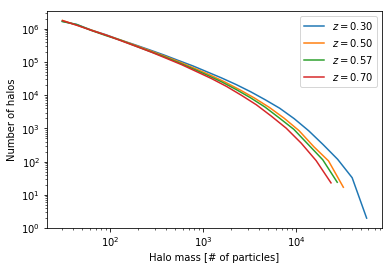

In [10]:
fig, ax = plt.subplots()
for z in sorted(cats_by_z.keys()):
    cat = cats_by_z[z]
    bin_edges, bin_centers, hist = Halos.halo_mass_hist(cat.halos[0]['N'])
    ax.loglog(bin_centers, hist, label='$z = {:.2f}$'.format(z))
ax.set_xlabel('Halo mass [# of particles]')
ax.set_ylabel('Number of halos')
ax.legend()

## [Halotools.py](https://github.com/lgarrison/AbacusCosmos/blob/master/AbacusCosmos/Halotools.py)

In [11]:
from AbacusCosmos import Halotools
import halotools

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Load two different cosmologies at redshift 0.1:

In [12]:
cats = Halotools.make_catalogs(sim_name='AbacusCosmos_720box', cosmologies=[0,1], redshifts=0.1,
                                products_dir='/mnt/store2/bigsim_products/AbacusCosmos_720box_products/',
                                phases=None, halo_type='Rockstar', load_halo_ptcl_catalog=False)

Generate mock galaxy catalogs for both:

In [13]:
for cat in cats:
    # First apply an arbitrary mass cut to make the example run faster
    cat.halo_table = cat.halo_table[cat.halo_table['halo_N'] >= 100]
    # Make an approximate concentration column for mock purposes
    cat.halo_table['halo_conc'] = cat.halo_table['halo_rvir'] / cat.halo_table['halo_klypin_rs']

In [14]:
from halotools.empirical_models import PrebuiltHodModelFactory
models = []
for cat in cats:
    model = PrebuiltHodModelFactory('zheng07', redshift=cats[0].redshift, concentration_key='halo_conc')
    model.populate_mock(cat)
    models += [model]

Compute the 2PCF on the mock galaxies:

In [15]:
import Corrfunc
bins = np.logspace(-1,1.5,25)
bin_centers = (bins[:-1] + bins[1:])/2.
tpcfs = []
for model in models:
    gals = model.mock.galaxy_table
    results = Corrfunc.theory.xi(X=gals['x'], Y=gals['y'], Z=gals['z'],
                            boxsize=model.mock.BoxSize, nthreads=4,
                            binfile=bins)
    tpcfs += [results]

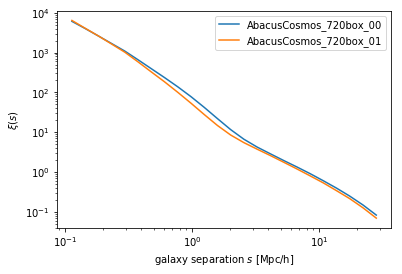

In [16]:
plt.loglog(bin_centers, tpcfs[0]['xi'], label=cats[0].SimName)
plt.loglog(bin_centers, tpcfs[1]['xi'], label=cats[1].SimName)
plt.legend()
plt.xlabel(r'galaxy separation $s$ [Mpc/h]')
plt.ylabel(r'$\xi(s)$')

### Print the particle subsamples for the 1000th halo in the second cosmology:

In [17]:
cats = Halotools.make_catalogs(sim_name='AbacusCosmos_720box', cosmologies=[0,1], redshifts=0.1,
                                products_dir='/mnt/store2/bigsim_products/AbacusCosmos_720box_products/',
                                phases=None, halo_type='Rockstar', load_halo_ptcl_catalog=True)

In [18]:
halos = cats[1].halo_table
subsamples = cats[1].halo_ptcl_table
i = 999

In [19]:
halos[i]

halo_upid,halo_A2 [3],halo_num_child_particles,halo_corevel [3],halo_energy,halo_min_vel_err,halo_p_start,halo_desc,halo_rvmax,halo_rvir,halo_vx,halo_bullock_spin,halo_vmax_r,halo_min_pos_err,halo_m_pe_d,halo_b_to_a2,halo_m_pe_b,halo_child_r,halo_c_to_a2,halo_mgrav,halo_A [3],halo_alt_m [4],halo_mvir,halo_num_p,halo_subsamp_start,halo_N_SO,halo_spin,halo_subsamp_len,halo_b_to_a,halo_x,halo_z,halo_m_SO,halo_c_to_a,halo_n_core,halo_alt_N [4],halo_min_bulkvel_err,halo_vrms,halo_Voff,halo_bulkvel [3],halo_alt_N_SO [4],halo_vmax,halo_alt_m_SO [4],halo_y,halo_Xoff,halo_id,halo_halfmass_radius,halo_vy,halo_vz,halo_flags,halo_klypin_rs,halo_rs,halo_kin_to_pot,halo_N,halo_J [3],halo_hostid
int64,float32,int64,float32,float32,float32,int64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int32,float32,int64,float32,float32,float32,float32,float32,int64,int32,float32,float32,float32,float32,int32,float32,float32,float32,float32,int64,float32,float32,float32,int64,float32,float32,float32,int32,float32,int64
569974,14.8675 .. -12.6811,207,-152.748 .. -599.933,-7.82279e+15,751.386,32769850,0,0.0342442,0.202554,-152.748,0.0234053,0.267052,4.50487e-05,3.90289e+11,0.947171,1.33911e+12,0.000278079,0.597965,9.18326e+11,-1.91093 .. 25.4669,9.18326e+11 .. 3.90289e+11,1.44636e+12,207,50850,841,0.020859,17,0.655851,31.8827,145.677,9.6539e+12,0.514556,53,80 .. 34,751.386,203.216,18.2015,-152.748 .. -599.933,841 .. 46,195.099,9.6539e+12 .. 5.28038e+11,45.7946,13.8211,569976,0.059089,859.761,-599.933,25,0.0133996,0.0133996,0.708265,126,-5.92084e+11 .. 5.50002e+11,569974


In [20]:
subsamples[halos['halo_subsamp_start'][i]:halos['halo_subsamp_start'][i] + halos['halo_subsamp_len'][i]]

y,x,vx,vy,vz,z
float32,float32,float32,float32,float32,float32
46.0763,31.5762,-469.43,693.177,-122.842,145.953
45.9182,31.9297,-362.675,732.662,-49.7216,145.876
45.7995,31.8661,-356.46,859.617,-504.528,145.8
46.2259,31.8782,-213.51,829.181,-650.768,145.767
45.6115,31.8745,-301.62,885.666,-222.102,145.736
45.4404,32.0737,-425.01,585.417,-160.407,145.709
46.2333,31.8689,-276.394,731.2,-451.882,145.694
45.8359,31.7978,-87.744,830.643,-365.6,145.69
45.8191,31.9025,-235.446,1061.7,-548.4,145.668
